# Week 7 Assignment
> Benzon Carlitos Salazar

The MNIST dataset is a dataset of 28 by 28 images of hand-written digits. Download it from http://yann.lecun.com/exdb/mnist/ (you only really need the training images and labels though). Since the dataset is quite large, restrict yourself to the first 1000 images, and their labels. You can read in the file `mnist_train.csv` which is the processed file having 1000 rows and 785 cols

- Store the cols 2:785 of this matrix as digits and the first col as labels. Digits should be a 1000 by 784 matrix.
- Write a function mykmeans to perform a k-means clustering of the 1000 images of digits. Use Euclidean distance as your distance measure between images (which can be viewed as vectors in a 784 dimensional space). Your function should take 3 arguments, the matrix
digits, the number of clusters K and the number of initializations N. You code should consist of 3 nested loops. The outermost (from 1 to N) cycles over random cluster initializations (i.e. you will call k-means N times with different initializations). The second loop (this could be a for or while loop) is the actual k-means algorithm for that initialization, and cycles over the iterations of k-means. Inside this are the actualiterations of k-means. Each iteration can have 2 successive loops from 1 to K: the first assigns observations to each cluster and the second recalculates the means of each cluster. These should not require further loops. (You will probably encounter empty clusters. It is possible to deal with these in clever ways, but here it is sufficient to assign empty clusters a random mean (just like you
initialized them)). Your function should return:
  - the cluster parameters and cluster assignments for the best solution
  - the objective/loss-function over k-means iterations for the best solution (this should be non-increasing)
- Run your code on the 1000 digits for K= 5; 10; 20; 25. Plot K values on the x-axis. For each setting of K , plot the best solution of objective/loss function on y axis. Copy the output of your code and the plot from c) to a docx file and submit to Week7Assignment folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv("../data/mnist_train.csv", header=None)

In [3]:
# Extract digits and labels
digits = mnist_train.iloc[:1000, 1:].values
labels = mnist_train.iloc[:1000, 0].values

In [4]:
def mykmeans(digits, K, N, num_iters=100):
    best_loss = float('inf')
    best_params = None
    best_assignments = None

    for _ in range(N):
        # Randomly initialize cluster centroids
        centroids = digits[np.random.choice(len(digits), K, replace=False)]
        for _ in range(num_iters):
            # Assign each digit to the nearest cluster
            assignments = np.argmin(np.linalg.norm(digits[:, np.newaxis] - centroids, axis=2), axis=1)
            # Calculate the new centroids
            new_centroids = np.array([digits[assignments == k].mean(axis=0) for k in range(K)])
            # Check if any clusters are empty, and assign them a random digit
            empty_clusters = np.where(np.isnan(new_centroids).any(axis=1))[0]
            new_centroids[empty_clusters] = digits[np.random.choice(len(digits), len(empty_clusters), replace=False)]

            # Check convergence
            if np.all(new_centroids == centroids):
                break
            centroids = new_centroids
        
        # Calculate loss for this initialization
        loss = np.sum((digits - centroids[assignments])**2)

        if loss < best_loss:
            best_loss = loss
            best_params = centroids
            best_assignments = assignments

    return best_params, best_assignments, best_loss

In [5]:
# Define K values to test
K_values = [5, 10, 15, 20, 25]

In [6]:
# Initialize N (number of initializations)
N = 10

In [7]:
# Store the losses for plotting
losses = []

In [8]:
for K in K_values:
    cluster_params, cluster_assignments, loss = mykmeans(digits, K, N)
    losses.append(loss)
    print(f"For K={K}, Loss={loss}")

For K=5, Loss=2730493715.2213736
For K=10, Loss=2392426671.640462
For K=15, Loss=2186990479.993099
For K=20, Loss=2070531780.442794
For K=25, Loss=1993317189.8912075


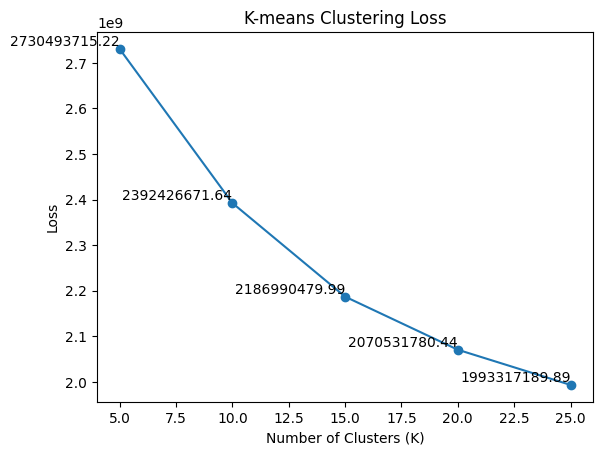

In [9]:
plt.plot(K_values, losses, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Loss')
for i, loss in enumerate(losses):
    plt.text(K_values[i], loss, f'{loss:.2f}', ha='right', va='bottom')
plt.title('K-means Clustering Loss')

plt.savefig("../kmeans_clustering_mnist.png")
plt.show()